# Exploratory Analysis

In [1]:
library(ggplot2)
library(forecast)
library(zoo)
library(data.table)

Warning message:
"package 'forecast' was built under R version 3.3.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



# Reading Data 

In [2]:
test <- fread("test/test.csv")
train <- fread("train/train.csv")
store <- fread("store/store.csv")

In [3]:
#first look at the data
print ("Training Data")
str(train)
print ("Test Data")
str(test)
print ("Store Data")
str(store)

[1] "Training Data"
Classes 'data.table' and 'data.frame':	1017209 obs. of  9 variables:
 $ Store        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek    : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Date         : chr  "2015-07-31" "2015-07-31" "2015-07-31" "2015-07-31" ...
 $ Sales        : int  5263 6064 8314 13995 4822 5651 15344 8492 8565 7185 ...
 $ Customers    : int  555 625 821 1498 559 589 1414 833 687 681 ...
 $ Open         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Promo        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ StateHoliday : chr  "0" "0" "0" "0" ...
 $ SchoolHoliday: chr  "1" "1" "1" "1" ...
 - attr(*, ".internal.selfref")=<externalptr> 
[1] "Test Data"
Classes 'data.table' and 'data.frame':	41088 obs. of  8 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Store        : int  1 3 7 8 9 10 11 12 13 14 ...
 $ DayOfWeek    : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Date         : chr  "2015-09-17" "2015-09-17" "2015-09-17" "2015-09-17" ...
 $ Open         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Pro

In [4]:
print ("Training Data........")
train[, Date := as.Date(Date)]
print ("Test Data........")
test[, Date := as.Date(Date)]
print ("Store Data........")
store

[1] "Training Data........"


Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1
6,5,2015-07-31,5651,589,1,1,0,1
7,5,2015-07-31,15344,1414,1,1,0,1
8,5,2015-07-31,8492,833,1,1,0,1
9,5,2015-07-31,8565,687,1,1,0,1
10,5,2015-07-31,7185,681,1,1,0,1


[1] "Test Data........"


Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
1,1,4,2015-09-17,1,1,0,0
2,3,4,2015-09-17,1,1,0,0
3,7,4,2015-09-17,1,1,0,0
4,8,4,2015-09-17,1,1,0,0
5,9,4,2015-09-17,1,1,0,0
6,10,4,2015-09-17,1,1,0,0
7,11,4,2015-09-17,1,1,0,0
8,12,4,2015-09-17,1,1,0,0
9,13,4,2015-09-17,1,1,0,0
10,14,4,2015-09-17,1,1,0,0


[1] "Store Data........"


Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,c,a,1270,9,2008,0,NA,NA,
2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
4,c,c,620,9,2009,0,NA,NA,
5,a,a,29910,4,2015,0,NA,NA,
6,a,a,310,12,2013,0,NA,NA,
7,a,c,24000,4,2013,0,NA,NA,
8,a,a,7520,10,2014,0,NA,NA,
9,a,c,2030,8,2000,0,NA,NA,
10,a,a,3160,9,2009,0,NA,NA,


# Summary Of Data

In [5]:
print("Summary ON Training Data")
summary(train)

[1] "Summary ON Training Data"


     Store          DayOfWeek          Date                Sales      
 Min.   :   1.0   Min.   :1.000   Min.   :2013-01-01   Min.   :    0  
 1st Qu.: 280.0   1st Qu.:2.000   1st Qu.:2013-08-17   1st Qu.: 3727  
 Median : 558.0   Median :4.000   Median :2014-04-02   Median : 5744  
 Mean   : 558.4   Mean   :3.998   Mean   :2014-04-11   Mean   : 5774  
 3rd Qu.: 838.0   3rd Qu.:6.000   3rd Qu.:2014-12-12   3rd Qu.: 7856  
 Max.   :1115.0   Max.   :7.000   Max.   :2015-07-31   Max.   :41551  
   Customers           Open            Promo        StateHoliday      
 Min.   :   0.0   Min.   :0.0000   Min.   :0.0000   Length:1017209    
 1st Qu.: 405.0   1st Qu.:1.0000   1st Qu.:0.0000   Class :character  
 Median : 609.0   Median :1.0000   Median :0.0000   Mode  :character  
 Mean   : 633.1   Mean   :0.8301   Mean   :0.3815                     
 3rd Qu.: 837.0   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :7388.0   Max.   :1.0000   Max.   :1.0000                     
 Schoo

In [6]:
print("Summary ON Test Data")
summary(test)

[1] "Summary ON Test Data"


       Id            Store          DayOfWeek          Date           
 Min.   :    1   Min.   :   1.0   Min.   :1.000   Min.   :2015-08-01  
 1st Qu.:10273   1st Qu.: 279.8   1st Qu.:2.000   1st Qu.:2015-08-12  
 Median :20545   Median : 553.5   Median :4.000   Median :2015-08-24  
 Mean   :20545   Mean   : 555.9   Mean   :3.979   Mean   :2015-08-24  
 3rd Qu.:30816   3rd Qu.: 832.2   3rd Qu.:6.000   3rd Qu.:2015-09-05  
 Max.   :41088   Max.   :1115.0   Max.   :7.000   Max.   :2015-09-17  
                                                                      
      Open            Promo        StateHoliday       SchoolHoliday     
 Min.   :0.0000   Min.   :0.0000   Length:41088       Length:41088      
 1st Qu.:1.0000   1st Qu.:0.0000   Class :character   Class :character  
 Median :1.0000   Median :0.0000   Mode  :character   Mode  :character  
 Mean   :0.8543   Mean   :0.3958                                        
 3rd Qu.:1.0000   3rd Qu.:1.0000                                   

In [7]:
#The store file contains information about the stores that can be linked to train and test via the store ID.
print("Summary ON Store Data")
summary(store)

[1] "Summary ON Store Data"


     Store         StoreType          Assortment        CompetitionDistance
 Min.   :   1.0   Length:1115        Length:1115        Min.   :   20.0    
 1st Qu.: 279.5   Class :character   Class :character   1st Qu.:  717.5    
 Median : 558.0   Mode  :character   Mode  :character   Median : 2325.0    
 Mean   : 558.0                                         Mean   : 5404.9    
 3rd Qu.: 836.5                                         3rd Qu.: 6882.5    
 Max.   :1115.0                                         Max.   :75860.0    
                                                        NA's   :3          
 CompetitionOpenSinceMonth CompetitionOpenSinceYear     Promo2      
 Min.   : 1.000            Min.   :1900             Min.   :0.0000  
 1st Qu.: 4.000            1st Qu.:2006             1st Qu.:0.0000  
 Median : 8.000            Median :2010             Median :1.0000  
 Mean   : 7.225            Mean   :2009             Mean   :0.5121  
 3rd Qu.:10.000            3rd Qu.:2013        

   # Exploring The Data

# Unique Values per Column in Data

In [8]:
# Unique values per column in training Dataset
train[, lapply(.SD, function(x) length(unique(x)))]

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1115,7,942,21734,4086,2,2,4,2


In [9]:
# Unique values per column in Test Dataset
test[, lapply(.SD, function(x) length(unique(x)))]

Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41088,856,7,48,3,2,2,2


In [10]:
paste ("Test stores exist in train data ", sum(unique(test$Store) %in% unique(train$Store))) 
paste ("Different test stores then train data ", sum(!(unique(train$Store) %in% unique(test$Store))))

[1] "Test stores exist in train data  856"

[1] "Different test stores then train data  259"

# Percentage of Features in Training & Test

In [11]:
print ("Percentage of Store to be open in Training Data")
table(train$Open) / nrow(train)
print ("Percentage of Store to be open in Test Data")
table(test$Open) / nrow(test)
print ("Percentage of promo in Training Data")
table(train$Promo) / nrow(train) 
print ("Percentage of promo in Test Data")
table(test$Promo) / nrow(test) 
print ("Percentage of the state holiday in Training Data (b and c = no easter holiday and no christmas)")
table(train$StateHoliday) / nrow(train)
print ("Percentage of the state holiday in Test Data")
table(test$StateHoliday) / nrow(test)
print ("Percentage of the school holiday in Training Data")
table(train$SchoolHoliday) / nrow(train)
print ("Percentage of the school holiday in Test Data")
table(test$SchoolHoliday) / nrow(test)

[1] "Percentage of Store to be open in Training Data"



        0         1 
0.1698933 0.8301067 

[1] "Percentage of Store to be open in Test Data"



        0         1 
0.1456386 0.8540937 

[1] "Percentage of promo in Training Data"



        0         1 
0.6184855 0.3815145 

[1] "Percentage of promo in Test Data"



        0         1 
0.6041667 0.3958333 

[1] "Percentage of the state holiday in Training Data (b and c = no easter holiday and no christmas)"



          0           a           b           c 
0.969475300 0.019917244 0.006576820 0.004030637 

[1] "Percentage of the state holiday in Test Data"



          0           a 
0.995619159 0.004380841 

[1] "Percentage of the school holiday in Training Data"



        0         1 
0.8213533 0.1786467 

[1] "Percentage of the school holiday in Test Data"



        0         1 
0.5565129 0.4434871 

#  Graph of Training Data according to Date between a specfic period

[1] "Training Data period ranges from 2013-01-01 to 2015-07-31."


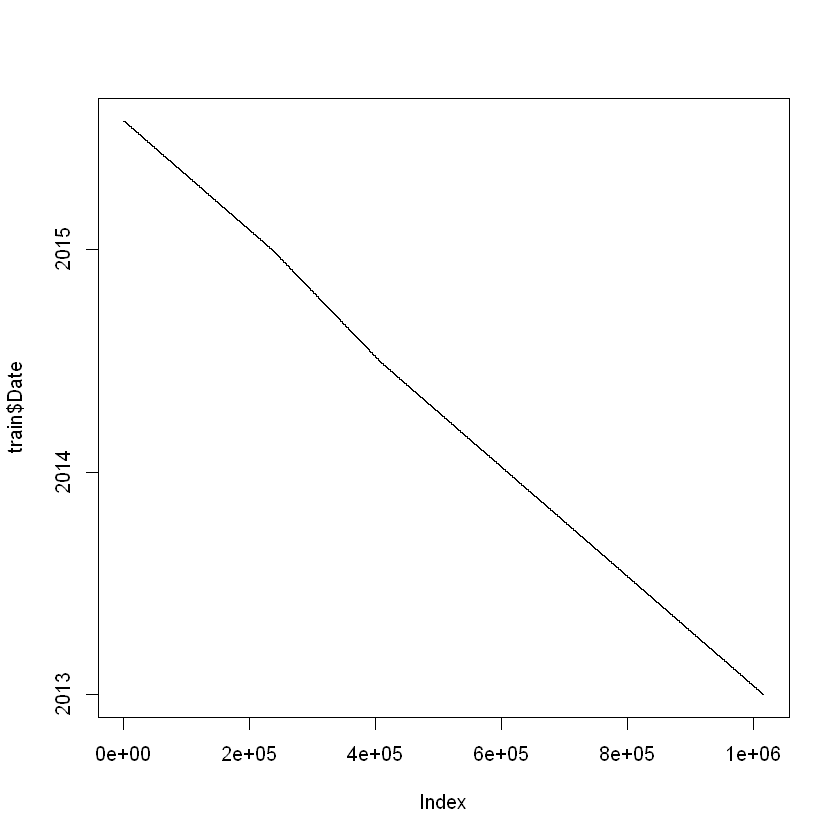

In [12]:
print ("Training Data period ranges from 2013-01-01 to 2015-07-31.")
plot(train$Date, type = "l")

# Graph of Test Data according to Date only for 48 Days¶

[1] "Test Data period ranges from 2015-08-01 to 2015-09-17."
[1] "Only 48 days to predict"


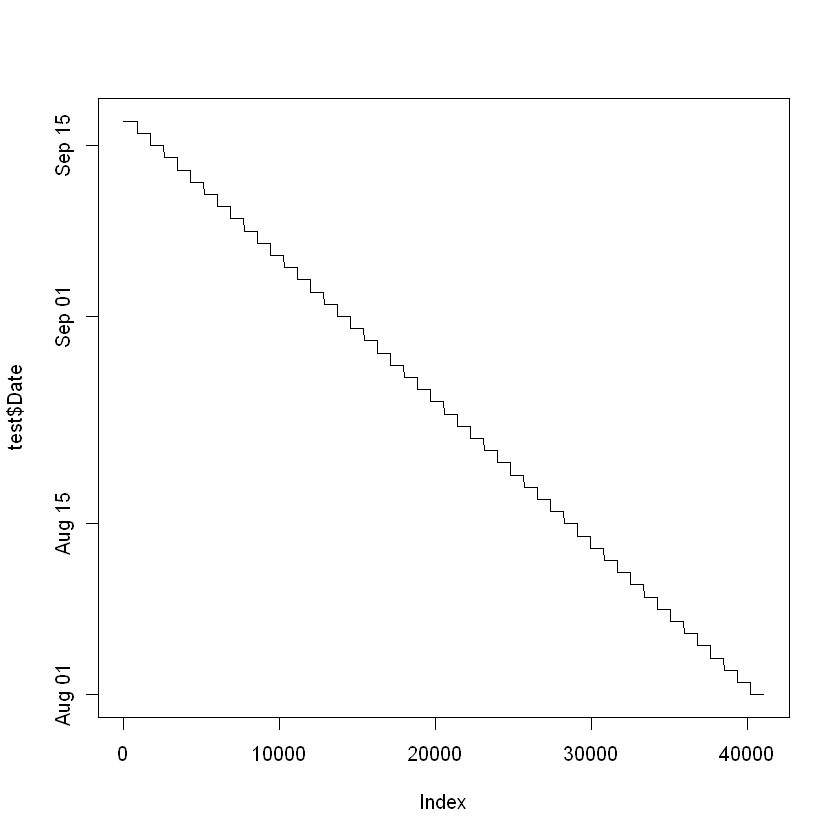

In [13]:
print ("Test Data period ranges from 2015-08-01 to 2015-09-17.")
print ("Only 48 days to predict")
plot(test$Date, type = "l")

# Unique tables in Training Set

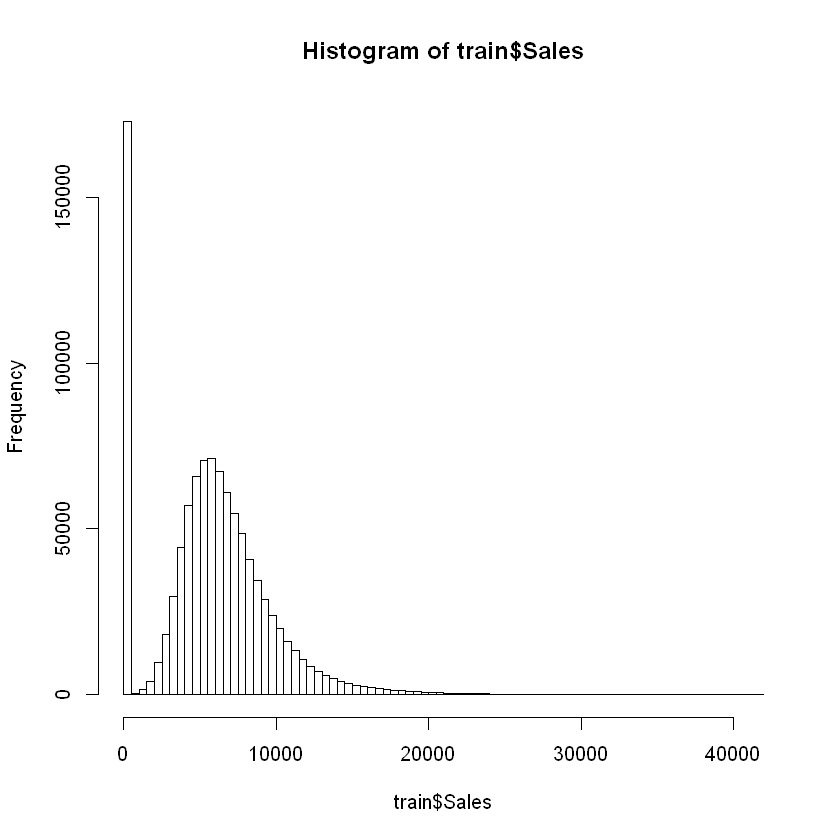

In [14]:
hist(train$Sales, 100)

[1] "Mean sales per store when stores were open"


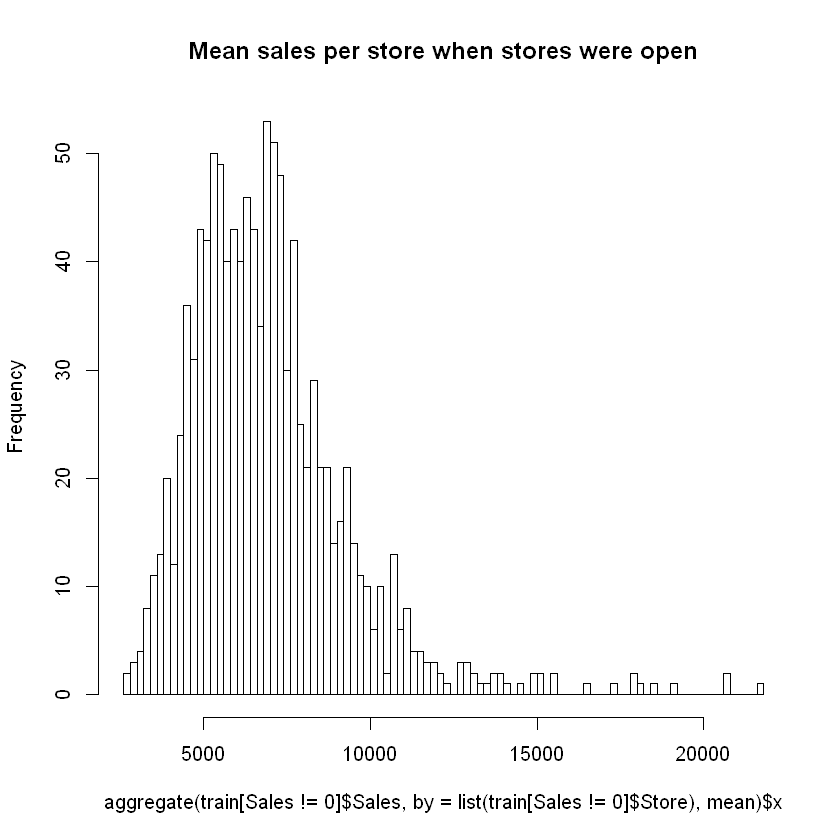

In [15]:
print ("Mean sales per store when stores were open")
hist(aggregate(train[Sales != 0]$Sales, 
               by = list(train[Sales != 0]$Store), mean)$x, 100, 
     main = "Mean sales per store when stores were open")

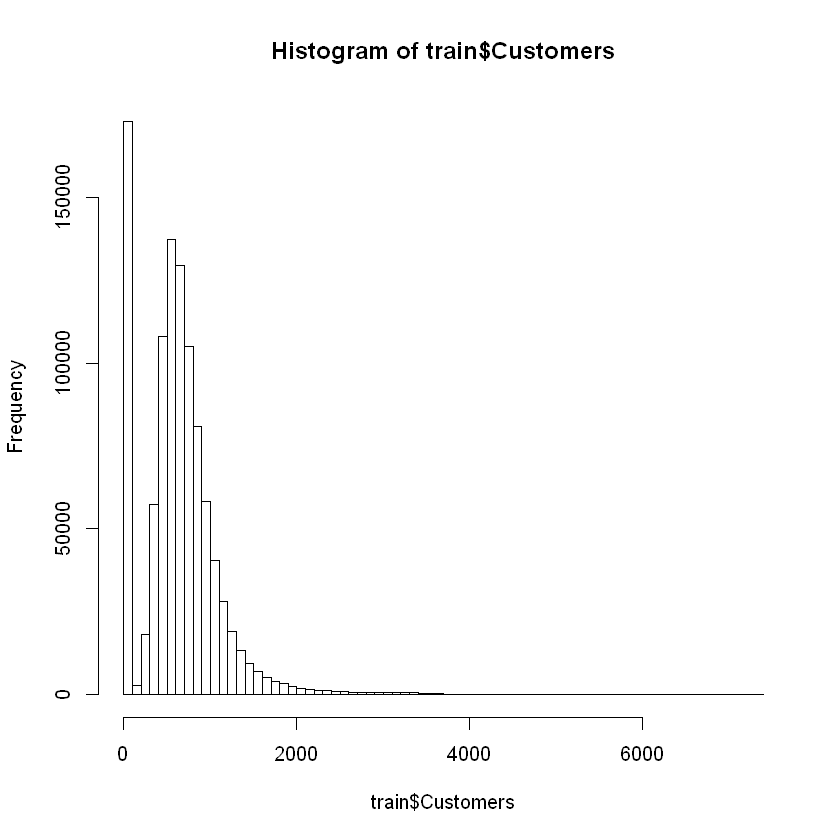

In [16]:
hist(train$Customers, 100)

[1] "Mean customers per store when stores were open"


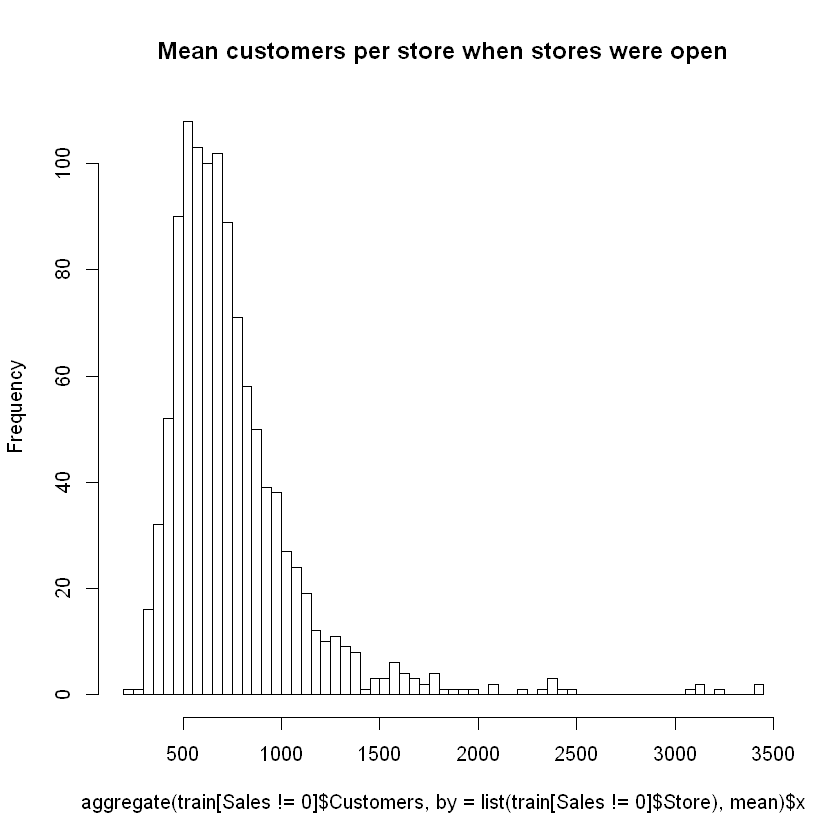

In [17]:
print ("Mean customers per store when stores were open")
hist(aggregate(train[Sales != 0]$Customers, 
               by = list(train[Sales != 0]$Store), mean)$x, 100,
     main = "Mean customers per store when stores were open")

# Graph of training data when customers visit stores

[1] "Plot of customers !=0 & sales!=0"


`geom_smooth()` using method = 'gam'


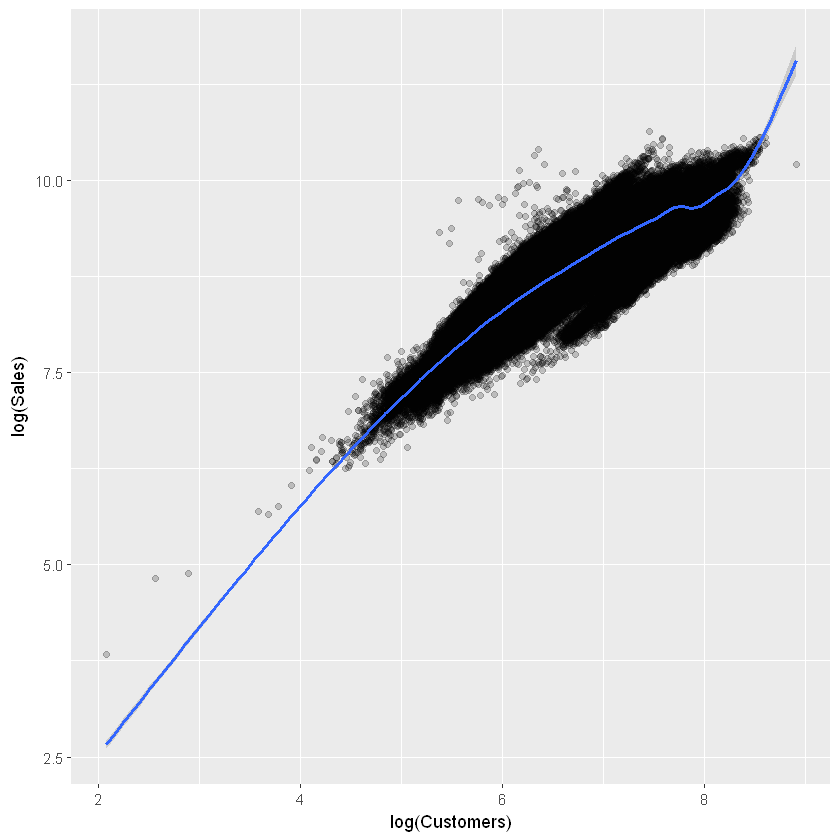

In [18]:
print ("Plot of customers !=0 & sales!=0")
ggplot(train[train$Sales != 0 & train$Customers != 0],
       aes(x = log(Customers), y = log(Sales))) + 
    geom_point(alpha = 0.2) + geom_smooth()

In [19]:
print ("Sales on without Promo")
with(train[train$Sales != 0 & train$Promo == 0], mean(Sales / Customers))
print ("Sales on with Promo")
with(train[train$Sales != 0 & train$Promo == 1], mean(Sales / Customers))

[1] "Sales on without Promo"


[1] 8.941128

[1] "Sales on with Promo"


[1] 10.17896

In [20]:
table(ifelse(train$Sales != 0, "Sales > 0", "Sales = 0"),
      ifelse(train$Promo, "Promo", "No promo"))

           
            No promo  Promo
  Sales = 0   161666  11205
  Sales > 0   467463 376875

In [21]:
table(ifelse(train$Open == 1, "Opened", "Closed"),
      ifelse(train$Sales > 0, "Sales > 0", "Sales = 0"))

        
         Sales = 0 Sales > 0
  Closed    172817         0
  Opened        54    844338

In [22]:
# Above mention tends is observed on consecutive days. Some stores even had customers (who bought nothing)
train[Open == 1 & Sales == 0]

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
971,5,2015-05-15,0,0,1,0,0,1
674,4,2015-03-26,0,0,1,0,0,0
699,4,2015-02-05,0,0,1,1,0,0
708,3,2014-10-01,0,0,1,1,0,0
357,1,2014-09-22,0,0,1,0,0,0
227,4,2014-09-11,0,0,1,0,0,0
835,4,2014-09-11,0,0,1,0,0,0
835,3,2014-09-10,0,0,1,0,0,0
548,5,2014-09-05,0,0,1,1,0,1
28,4,2014-09-04,0,0,1,1,0,0


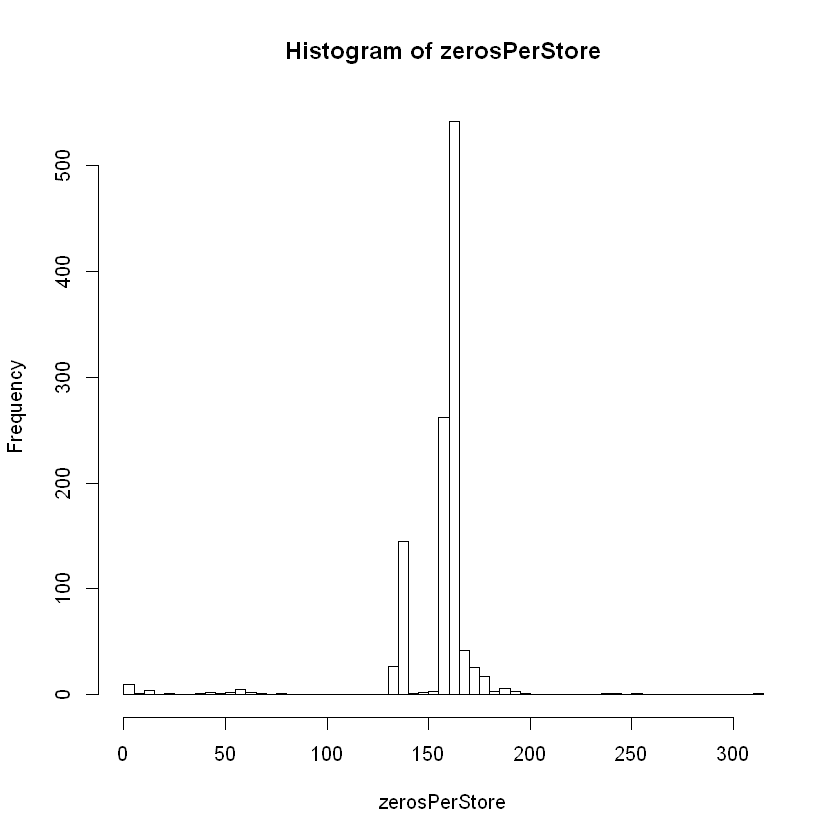

In [23]:
zerosPerStore <- sort(tapply(train$Sales, list(train$Store), function(x) sum(x == 0)))
hist(zerosPerStore,100)

In [24]:
tail(zerosPerStore,10)

105 339 837  25 560 674 972 349 708 103 
188 188 191 192 195 197 240 242 255 311

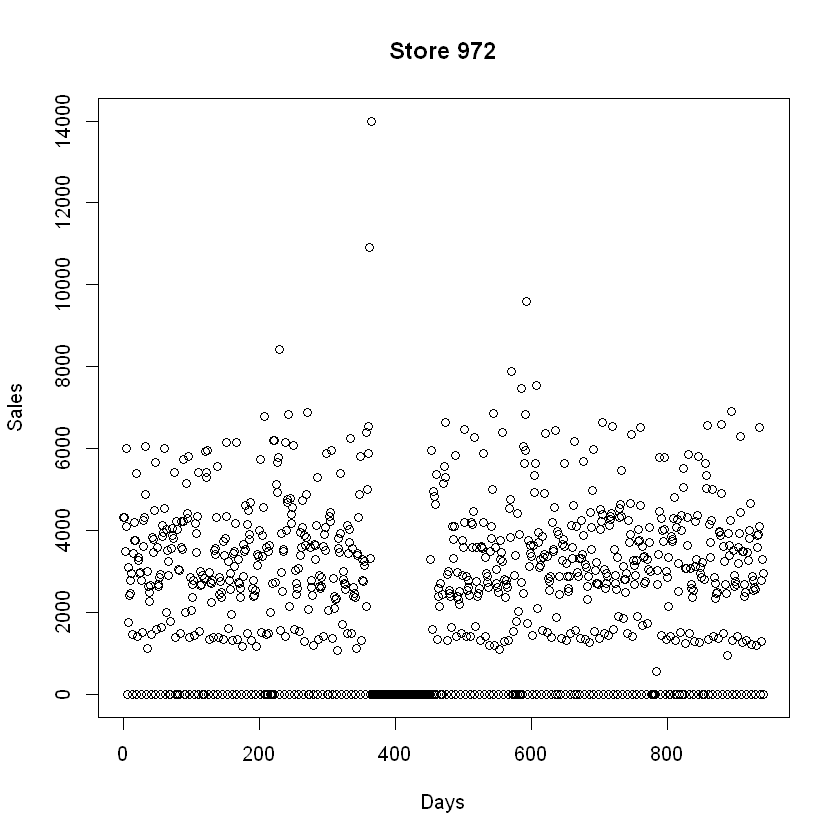

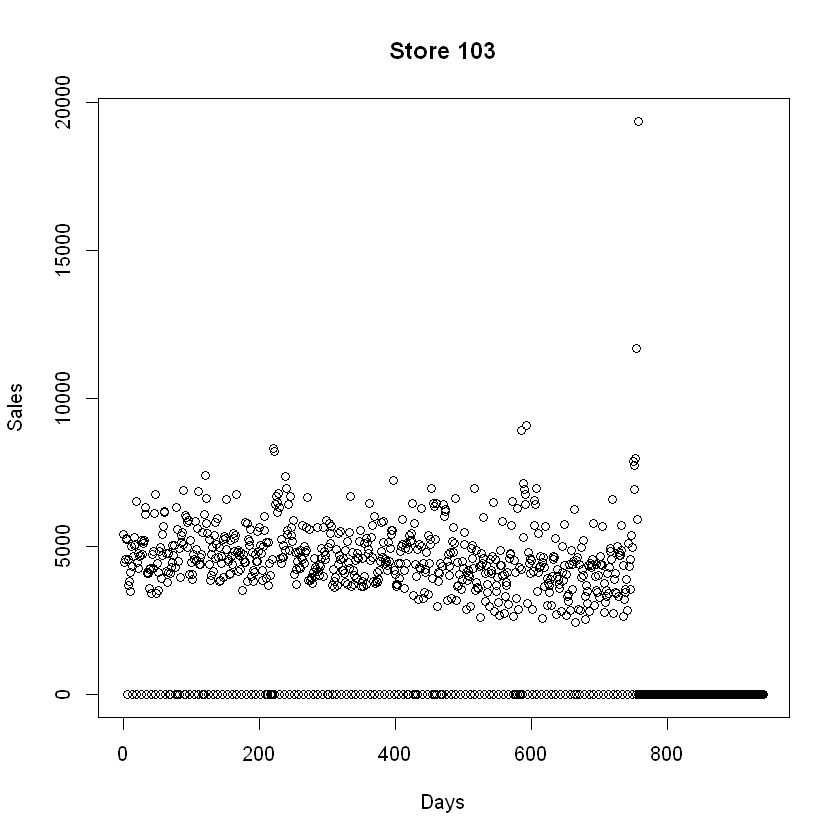

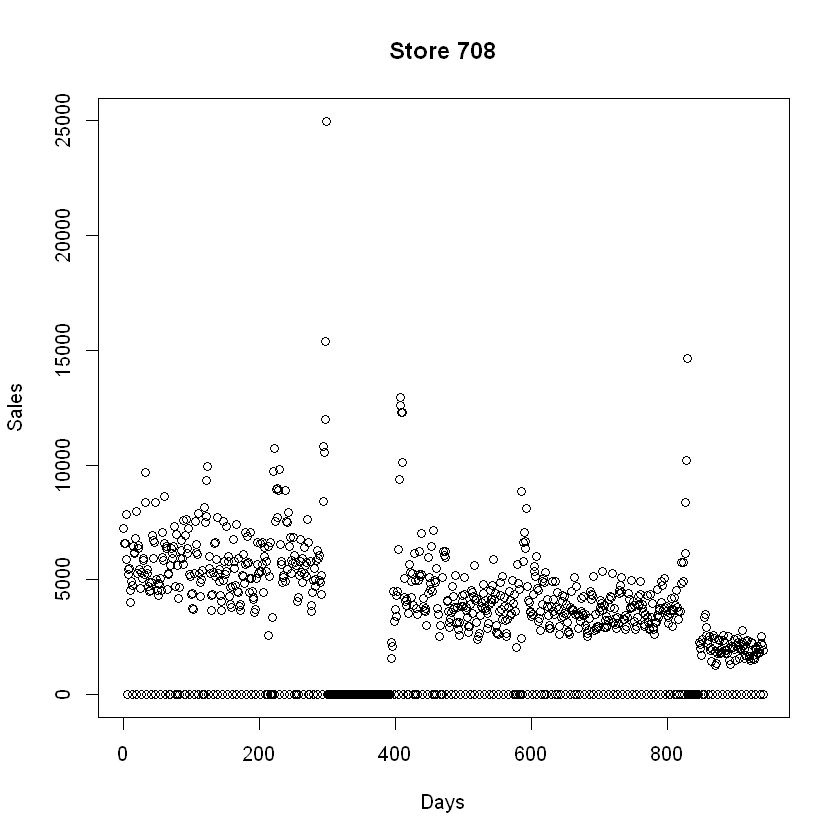

In [25]:
# Some stores were closed for some time, some of those were closed multiple times
plot(train[Store == 972, Sales], ylab = "Sales", xlab = "Days", main = "Store 972")
plot(train[Store == 103, Sales], ylab = "Sales", xlab = "Days", main = "Store 103")
plot(train[Store == 708, Sales], ylab = "Sales", xlab = "Days", main = "Store 708")

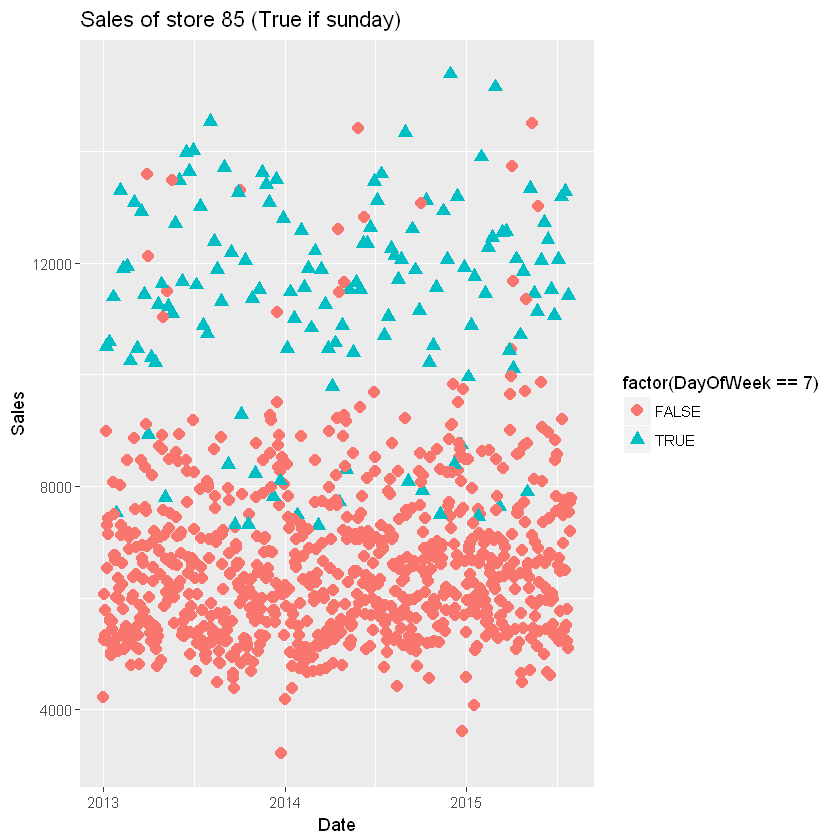

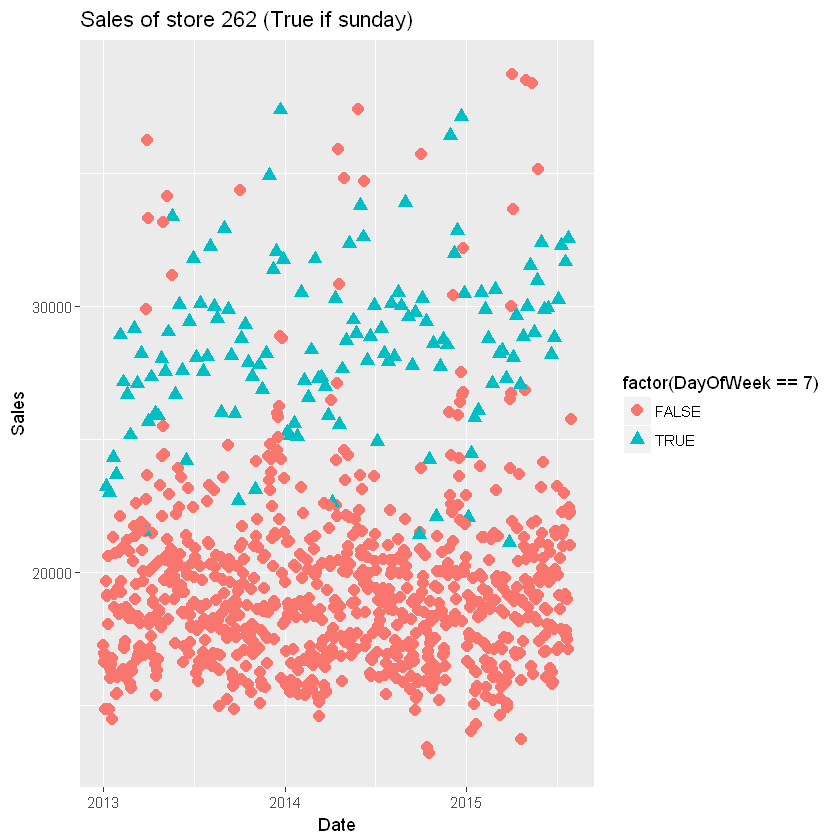

In [26]:
#There are also stores that have no zeros in their sales. 
#These are the exception since they are opened also on sundays / holidays.

ggplot(train[Store == 85], 
       aes(x = Date, y = Sales, 
           color = factor(DayOfWeek == 7), shape = factor(DayOfWeek == 7))) + 
    geom_point(size = 3) + ggtitle("Sales of store 85 (True if sunday)")

ggplot(train[Store == 262], 
       aes(x = Date, y = Sales, 
           color = factor(DayOfWeek == 7), shape = factor(DayOfWeek == 7))) + 
    geom_point(size = 3) + ggtitle("Sales of store 262 (True if sunday)")

# Exploring The Store CSV File

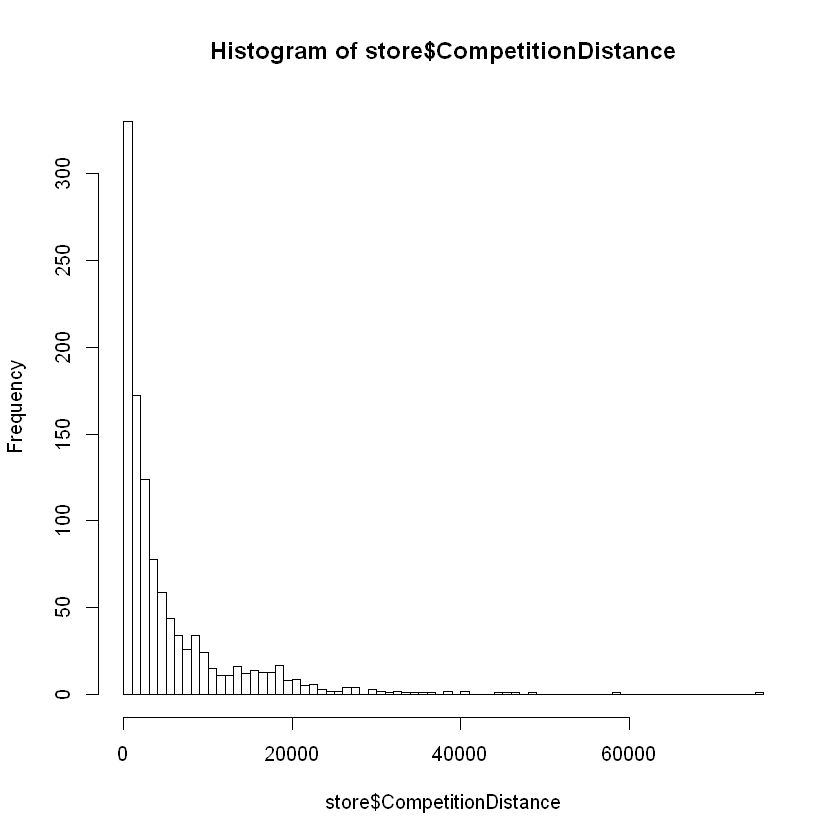

In [27]:
hist(store$CompetitionDistance, 100)

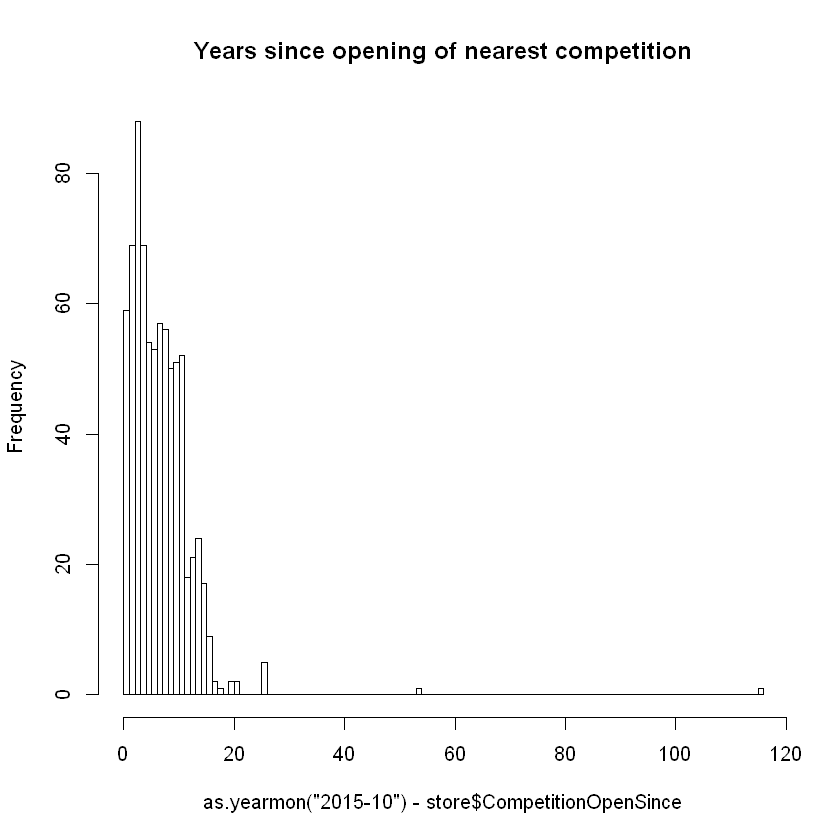

In [28]:
# Convert the CompetitionOpenSince... variables to one Date variable
store$CompetitionOpenSince <- as.yearmon(paste(store$CompetitionOpenSinceYear, 
                                               store$CompetitionOpenSinceMonth, sep = "-"))
hist(as.yearmon("2015-10") - store$CompetitionOpenSince, 100, 
     main = "Years since opening of nearest competition")

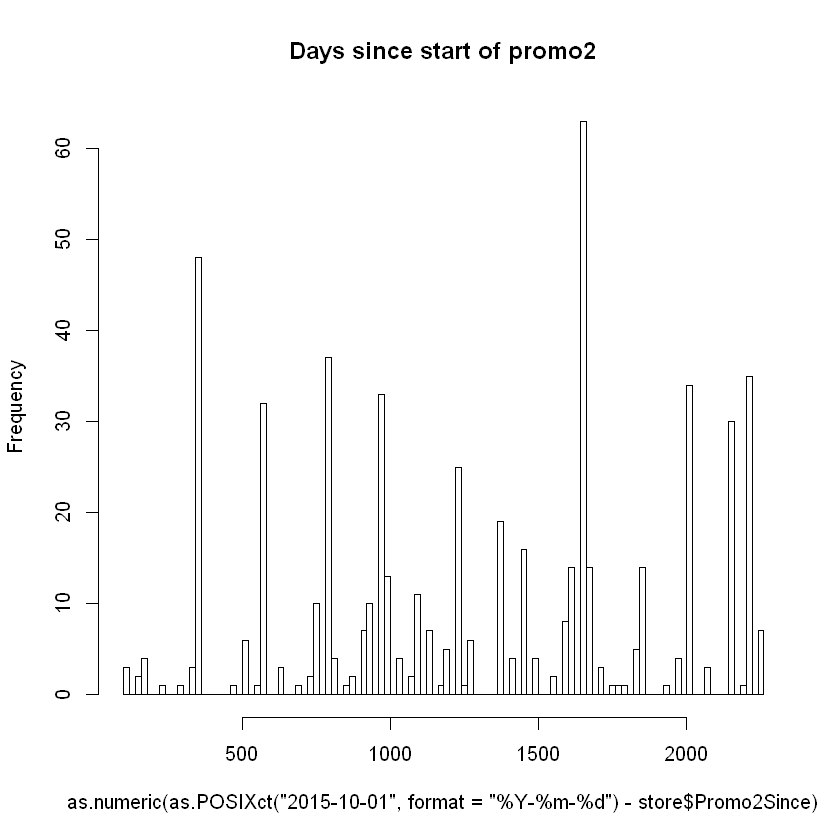

In [29]:
# Converting the Promo2Sinc variables to one Date variable
# Assume that the promo starts on the first day of the week
store$Promo2Since <- as.POSIXct(paste(store$Promo2SinceYear, 
                                   store$Promo2SinceWeek, 1, sep = "-"),
                             format = "%Y-%U-%u")
hist(as.numeric(as.POSIXct("2015-10-01", format = "%Y-%m-%d") - store$Promo2Since), 
     100, main = "Days since start of promo2")

In [30]:
table(store$PromoInterval)


                  Feb,May,Aug,Nov  Jan,Apr,Jul,Oct Mar,Jun,Sept,Dec 
             544              130              335              106 

In [31]:
train_store <- merge(train, store, by = "Store")

`geom_smooth()` using method = 'gam'


`geom_smooth()` using method = 'gam'


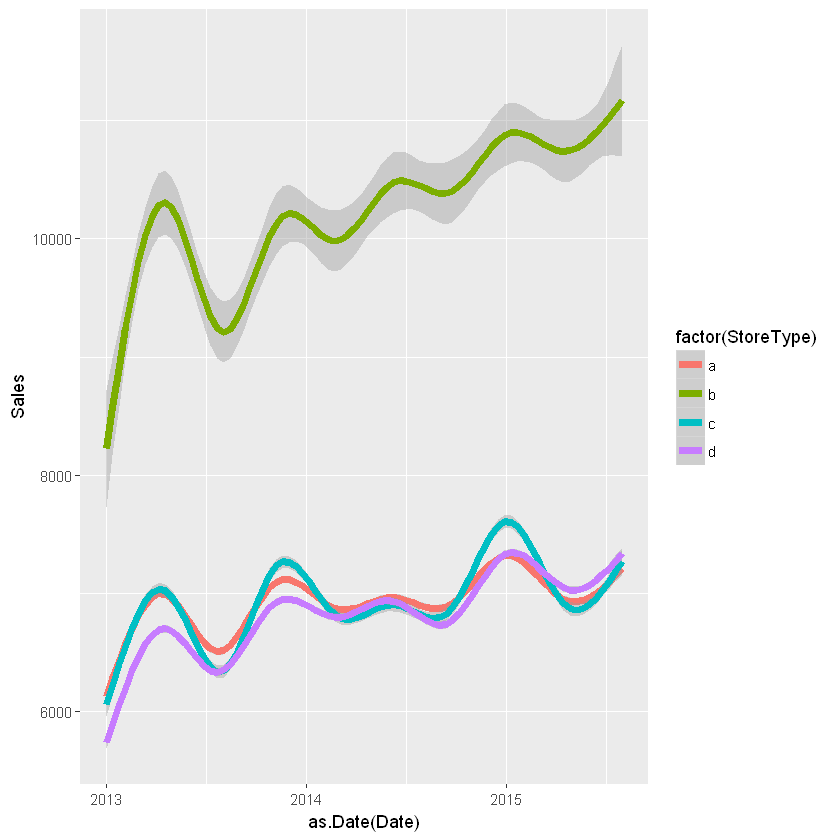

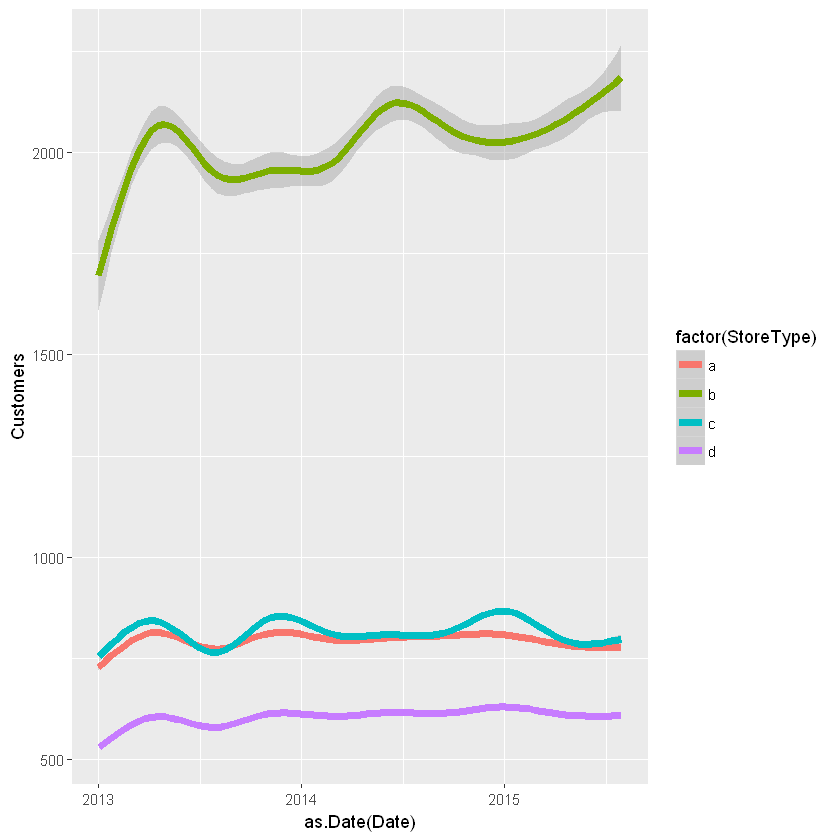

In [32]:
#The different store types imply different overall levels of sales and seem to be exhibiting different trends
ggplot(train_store[Sales != 0],aes(x = as.Date(Date), y = Sales, color = factor(StoreType))) + geom_smooth(size = 2)

ggplot(train_store[Customers != 0], aes(x = as.Date(Date), y = Customers, color = factor(StoreType))) + geom_smooth(size = 2)

`geom_smooth()` using method = 'gam'


`geom_smooth()` using method = 'gam'


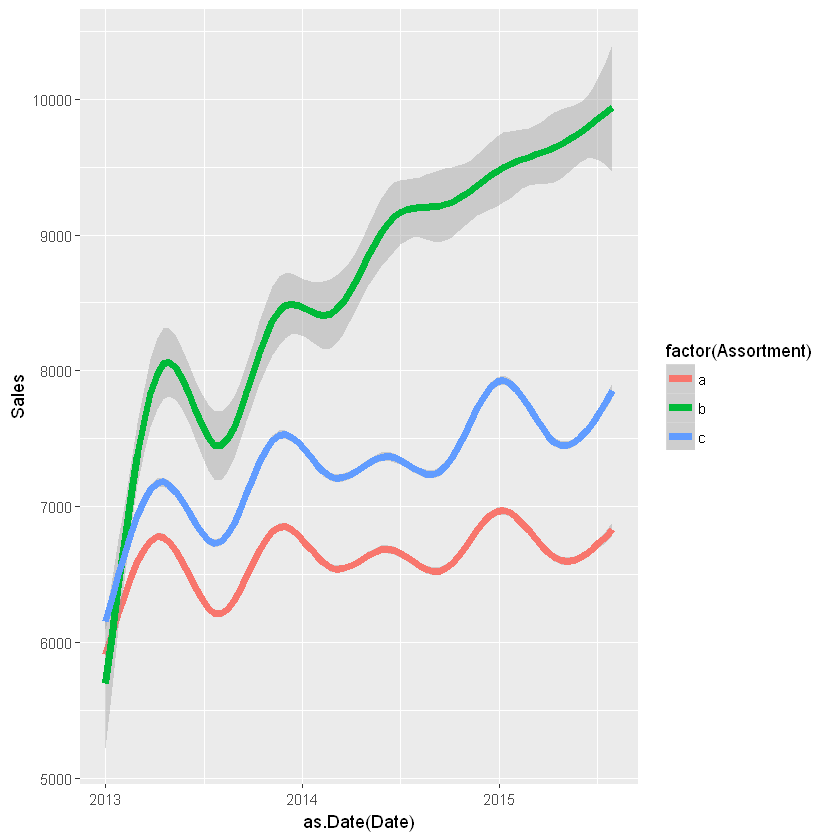

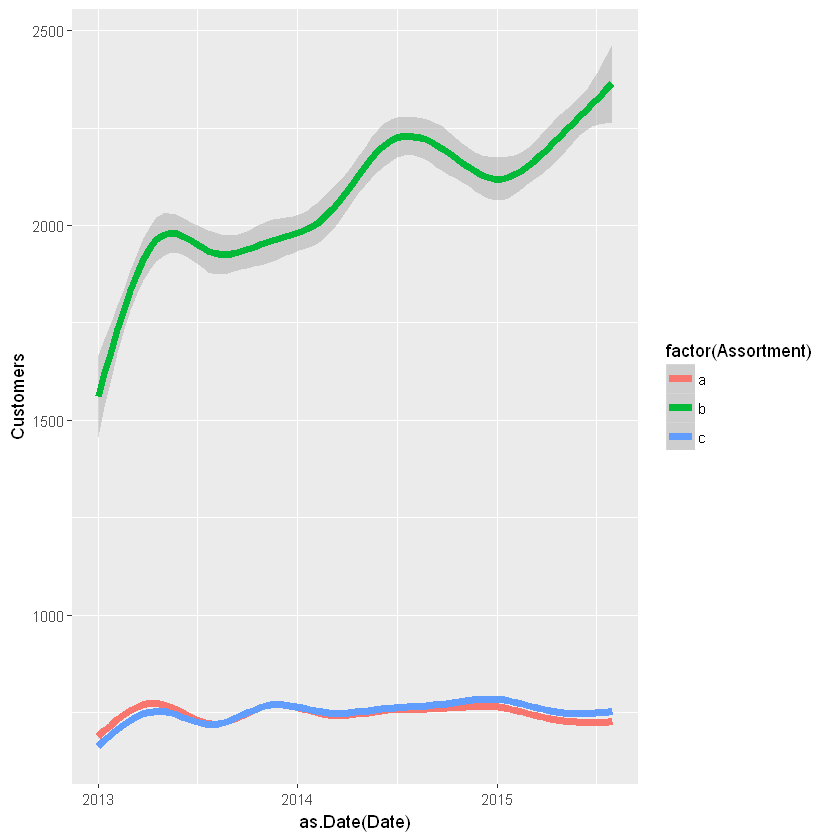

In [33]:
# The different assortment types imply different overall levels of sales and seem to be exhibiting different trends
ggplot(train_store[Sales != 0], aes(x = as.Date(Date), y = Sales, color = factor(Assortment))) + geom_smooth(size = 2)
ggplot(train_store[Customers != 0], aes(x = as.Date(Date), y = Customers, color = factor(Assortment))) + geom_smooth(size = 2)

`geom_smooth()` using method = 'loess'


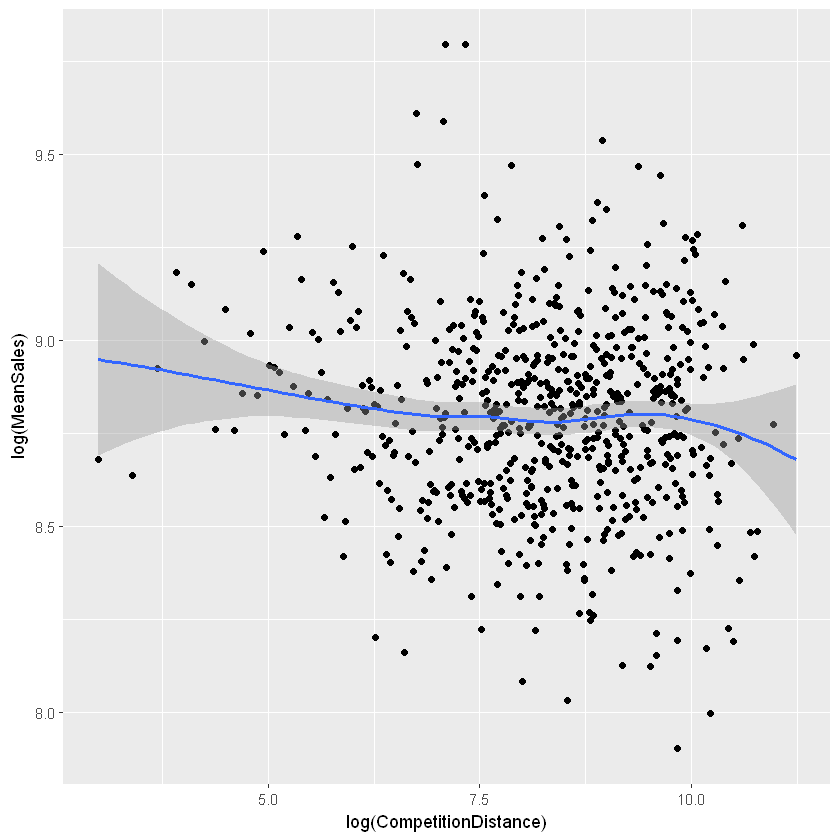

In [34]:
salesByDist <- aggregate(train_store[Sales != 0 & !is.na(CompetitionDistance)]$Sales, 
               by = list(train_store[Sales != 0 & !is.na(CompetitionDistance)]$CompetitionDistance), mean)
colnames(salesByDist) <- c("CompetitionDistance", "MeanSales")
ggplot(salesByDist, aes(x = log(CompetitionDistance), y = log(MeanSales))) + 
    geom_point() + geom_smooth()

`geom_smooth()` using method = 'gam'


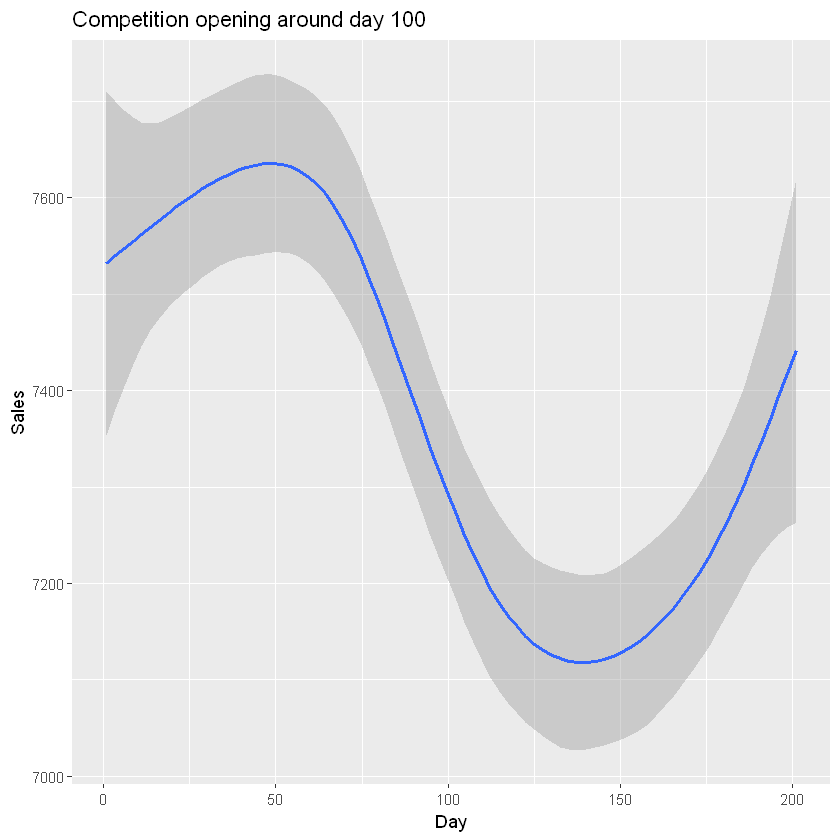

In [35]:
# Sales before and after competition opens
train_store$DateYearmon <- as.yearmon(train_store$Date)
train_store <- train_store[order(Date)]
timespan <- 100 # Days to collect before and after Opening of competition
beforeAndAfterComp <- function(s) {
    x <- train_store[Store == s]
    daysWithComp <- x$CompetitionOpenSince >= x$DateYearmon
    if (any(!daysWithComp)) {
        compOpening <- head(which(!daysWithComp), 1) - 1
        if (compOpening > timespan & compOpening < (nrow(x) - timespan)) {
           x <- x[(compOpening - timespan):(compOpening + timespan), ] 
            x$Day <- 1:nrow(x)
            return(x)
        }
    }
}
temp <- lapply(unique(train_store[!is.na(CompetitionOpenSince)]$Store), beforeAndAfterComp)
temp <- do.call(rbind, temp)

ggplot(temp[Sales != 0], aes(x = Day, y = Sales)) + geom_smooth() + ggtitle(paste("Competition opening around day", timespan))

In [36]:
temp <- train
temp$year <- format(temp$Date, "%Y")
temp$month <- format(temp$Date, "%m")
temp[, StoreMean := mean(Sales), by = Store]
temp <- temp[, .(MonthlySalesMean = mean(Sales / (StoreMean)) * 100), 
             by = .(year, month)]
temp <- as.data.frame(temp)

SalesTS <- ts(temp$MonthlySalesMean, start=2013, frequency=12)
col = rainbow(3)

Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,StoreMean
1,5,2015-07-31,5263,555,1,1,0,1,2015,07,3945.705
2,5,2015-07-31,6064,625,1,1,0,1,2015,07,4122.992
3,5,2015-07-31,8314,821,1,1,0,1,2015,07,5741.254
4,5,2015-07-31,13995,1498,1,1,0,1,2015,07,8021.770
5,5,2015-07-31,4822,559,1,1,0,1,2015,07,3867.110
6,5,2015-07-31,5651,589,1,1,0,1,2015,07,4562.376
7,5,2015-07-31,15344,1414,1,1,0,1,2015,07,7356.902
8,5,2015-07-31,8492,833,1,1,0,1,2015,07,4610.252
9,5,2015-07-31,8565,687,1,1,0,1,2015,07,5426.816
10,5,2015-07-31,7185,681,1,1,0,1,2015,07,4634.439


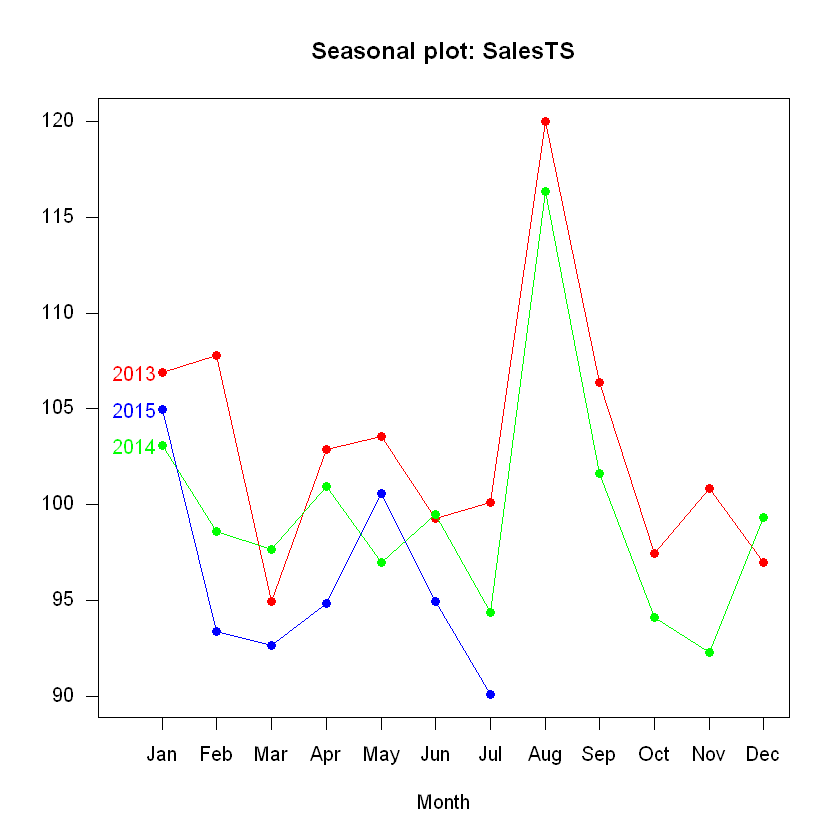

In [37]:
seasonplot(SalesTS, col=col, year.labels.left = TRUE, pch=19, las=1)